In [ ]:
# Suppose you work in data analysis at Uber; you need to provide answers to all the questions given below to the company

# 1) In which category do people book the most Uber rides?

# 2) For which purpose do people book Uber rides the most?

# 3) At what time do people book cabs the most from Uber?

# 4) In which months do people book Uber rides less frequently?

# 5) On which days of the week do people book Uber rides the most?

# 6) How many miles do people usually book a cab for through Uber?

In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [19]:
data = pd.read_csv("UberDataset.csv")
data.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting
9,01-10-2016 12:17,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# DATA PREPROCESSING (CLEANING)

In [21]:
# data["PURPOSE"].fillna("not",inplace = True)
data["PURPOSE"] = data["PURPOSE"].fillna("not")


In [22]:
data.tail(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1146,12/30/2016 11:31,12/30/2016 11:56,Business,Kar?chi,Kar?chi,2.9,Errand/Supplies
1147,12/30/2016 15:41,12/30/2016 16:03,Business,Kar?chi,Kar?chi,4.6,Errand/Supplies
1148,12/30/2016 16:45,12/30/2016 17:08,Business,Kar?chi,Kar?chi,4.6,Meeting
1149,12/30/2016 23:06,12/30/2016 23:10,Business,Kar?chi,Kar?chi,0.8,Customer Visit
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,not


In [23]:
data["START_DATE"] = pd.to_datetime(data["START_DATE"], errors = 'coerce')
data["END_DATE"] = pd.to_datetime(data["END_DATE"], errors = 'coerce')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [25]:
from datetime import datetime 

data["start_date"] = pd.DatetimeIndex(data['START_DATE']).date
data["start_hour"] = pd.DatetimeIndex(data['START_DATE']).hour

In [31]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,start_date,start_hour
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,not,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [26]:
data["shift"] = pd.cut(x=data["start_hour"],bins = [0,10,15,19,24],labels= ["morning","afternoon","evening","night"])

In [27]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,start_date,start_hour,shift
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,not,2016-01-02,1.0,morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,afternoon


In [28]:
data.dropna(inplace = True)

In [29]:
data.shape

(413, 10)

# data visulization

In [ ]:
# 1) In which category do people book the most Uber rides?
# 2) For which purpose do people book Uber rides the most?

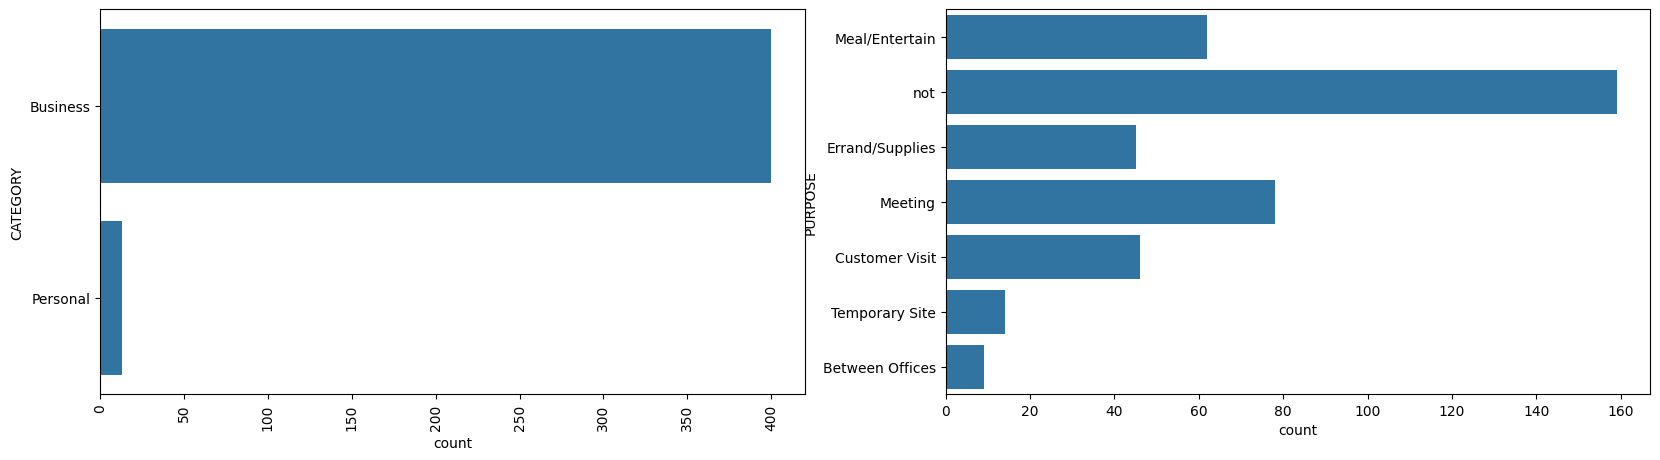

In [35]:
# 1) In which category do people book the most Uber rides?
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)

sns.countplot(data['CATEGORY'])
plt.xticks(rotation = 90)


# 2) For which purpose do people book Uber rides the most?
plt.subplot(1,2,2)
sns.countplot(data['PURPOSE'])
plt.show()

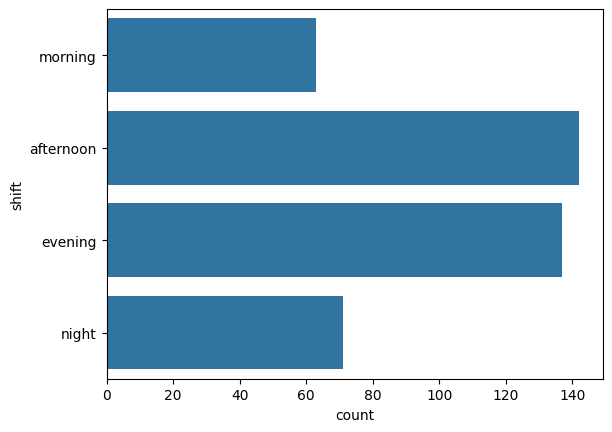

In [38]:
# 3) At what time do people book cabs the most from Uber?
# plt.subplot(1,2,3)
sns.countplot(data['shift'])
plt.show()

In [ ]:
# 4) In which months do people book Uber rides less frequently?

# 5) On which days of the week do people book Uber rides the most?

In [44]:
data['month'] =pd.DatetimeIndex(data["START_DATE"]).month
month_label = {1.0 : "jan", 2.0 : "feb", 3.0 : "march",4.0:'april',
              5.0 : 'may',6.0 :'june',7.0 : 'july' ,8.0 :'aug',
              9.0 : 'sept', 10.0 : 'oct',11.0 :'nov', 12.0 : 'dec '}
data["month"] = data.month.map(month_label)

mon = data.month.value_counts(sort = False)

In [50]:
data.tail(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,start_date,start_hour,shift,month
1043,2016-12-12 13:22:00,2016-12-12 13:32:00,Business,Cary,Cary,3.1,Errand/Supplies,2016-12-12,13.0,afternoon,dec
1044,2016-12-12 13:36:00,2016-12-12 13:51:00,Business,Cary,Apex,4.4,Meal/Entertain,2016-12-12,13.0,afternoon,dec
1045,2016-12-12 14:26:00,2016-12-12 14:39:00,Business,Apex,Cary,4.7,Customer Visit,2016-12-12,14.0,afternoon,dec
1046,2016-12-12 17:51:00,2016-12-12 18:01:00,Business,Cary,Morrisville,3.0,Meal/Entertain,2016-12-12,17.0,evening,dec
1047,2016-12-12 20:48:00,2016-12-12 20:57:00,Business,Morrisville,Cary,3.0,Customer Visit,2016-12-12,20.0,night,dec


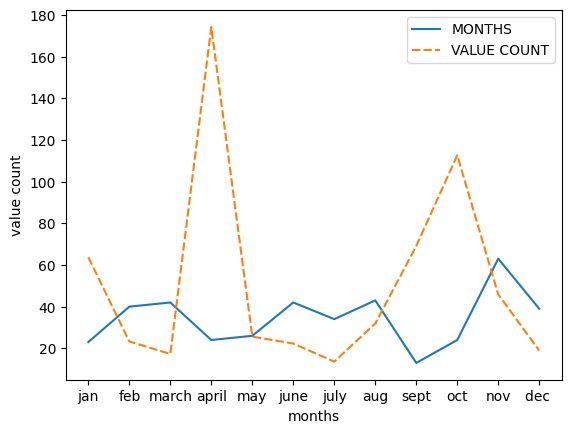

In [55]:
# 4) In which months do people book Uber rides less frequently?
# ans = dec and jan

df = pd.DataFrame({
    "MONTHS" : mon.values,
    "VALUE COUNT" : data.groupby('month', sort = False)["MILES"].max()
})

p =  sns.lineplot(data = df)
p.set(xlabel = "months",ylabel = "value count")
plt.show()

In [60]:
data["day"] = data.START_DATE.dt.weekday

day_label = {0 : 'mon', 1 : 'tue', 2 : 'wed', 3 : 'thur' , 4 : 'fri' , 5 : 'sat', 6 : 'sun'}

data['day'] =  data['day'].map(day_label)

In [61]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,start_date,start_hour,shift,month,day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,4,21.0,night,jan,fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,not,5,1.0,morning,jan,sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,5,20.0,night,jan,sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,1,17.0,evening,jan,tue
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2,14.0,afternoon,jan,wed


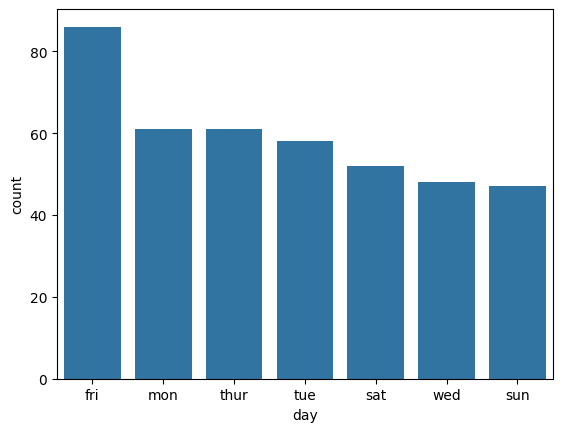

In [62]:
# 5) On which days of the week do people book Uber rides the most?
# friday


day_label = data.day.value_counts()

sns.barplot(x = day_label.index, y = day_label)
plt.xlabel('day')
plt.ylabel('count')
plt.show()

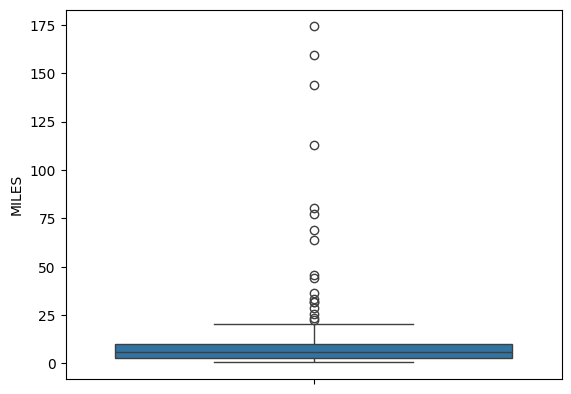

In [66]:
# 6) How many miles do people usually book a cab for through Uber?

sns.boxplot(data['MILES'])
plt.show()

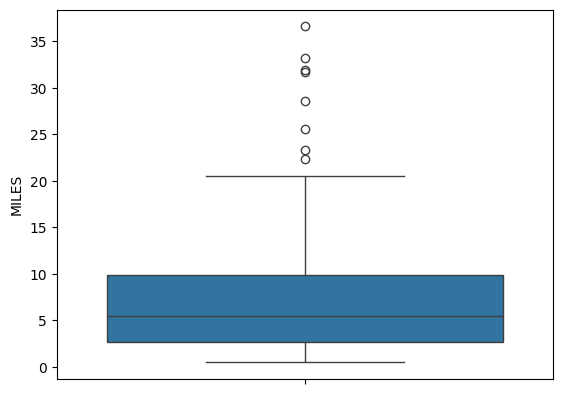

In [68]:
sns.boxplot(data[data['MILES']<40]['MILES'])
plt.show()

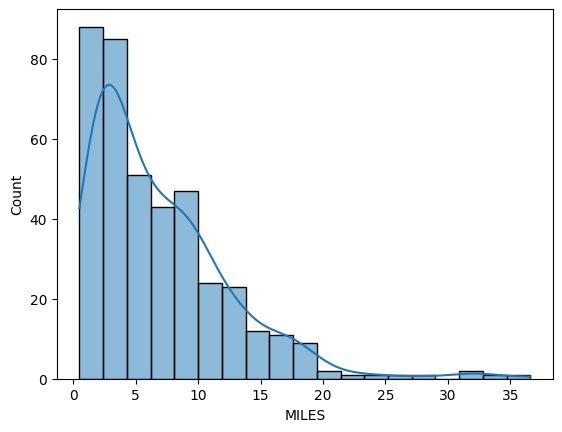

In [73]:
sns.histplot(data[data['MILES'] <40]['MILES'],kde = True)
plt.show()